<h1>Customer Experience & Delivery Performance Analysis</h1>

<p>
This analysis explores the relationship between delivery performance and customer satisfaction
in an e-commerce platform aiming for exponential growth.
</p>

<p>
The objective is not only to describe historical performance, but to identify
actionable levers that can elevate the brand perception from <strong>"good"</strong> to
<strong>"exceptional"</strong>.
</p>

<hr>

<h2>Business Context</h2>

<p>
In highly competitive e-commerce environments, customer perception is often shaped by two key factors:
</p>

<ul>
  <li>Delivery reliability</li>
  <li>Post-purchase satisfaction (reviews)</li>
</ul>

<p>
Even small inefficiencies in logistics or customer experience can significantly impact long-term growth,
brand trust, and repeat purchases.
</p>

<p>
This analysis assumes a company mindset focused on <strong>category optimization</strong>
rather than short-term elimination of underperforming products.
</p>

<hr>

<h2>Data Scope</h2>

<p>
The analysis focuses on the integration of three core entities:
</p>

<ul>
  <li><strong>Orders</strong>: operational and delivery timelines</li>
  <li><strong>Order Reviews</strong>: customer satisfaction signals</li>
  <li><strong>Customers</strong>: geographic and behavioral context</li>
</ul>

<p>
These tables allow us to connect operational performance with customer perception,
creating a foundation for experience-driven optimization.
</p>

<hr>

In [31]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [32]:
DATA_PATH = Path("../data/raw/olist")

In [33]:
customers = pd.read_csv(DATA_PATH / "customers.csv")
orders = pd.read_csv(DATA_PATH / "orders.csv")
order_items = pd.read_csv(DATA_PATH / "order_items.csv") 
order_reviews = pd.read_csv(DATA_PATH / "order_reviews.csv")
payments = pd.read_csv(DATA_PATH / "payments.csv")
products = pd.read_csv(DATA_PATH / "products.csv")
sellers = pd.read_csv(DATA_PATH / "sellers.csv")

<h2>Delivery Performance Indicator</h2>

<p>
To evaluate logistics reliability, an on-time delivery indicator is constructed by
comparing the estimated delivery date with the actual delivery date.
</p>

<p>
This metric serves as a proxy for operational efficiency and is expected to have
a direct impact on customer satisfaction.
</p>

In [41]:
orders["on_time_delivery"] = (orders["order_delivered_customer_date"]
                              <= orders["order_estimated_delivery_date"])

In [35]:
#Calculate On-Time Delivery Rate

#to_date
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"], errors="coerce")
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"], errors= "coerce")

#on_time_rate
orders = orders.loc[orders["order_delivered_customer_date"].notna()].copy()

orders["on_time_delivery"] = (orders["order_delivered_customer_date"].values
<= orders["order_estimated_delivery_date"].values)

on_time_rate = orders["on_time_delivery"].mean()
on_time_rate

np.float64(0.9188710145528421)

<h3>Key Insight</h3>

<p>
The observed on-time delivery rate of approximately <strong>91.9%</strong> indicates
solid operational performance, but falls short of excellence.
</p>

<p>
For companies pursuing exponential growth, this gap represents a critical
optimization opportunity rather than an acceptable margin.
</p>

<hr>

In [36]:
#Calculate Customer Satisfaction 

avg_review_score = order_reviews["review_score"].mean()
avg_review_score


np.float64(4.08642062404257)

<h2>Customer Satisfaction Analysis</h2>
<p>
The average review score provides a high-level view of customer perception.
While a score above 4 suggests general satisfaction, it does not yet position the company
as a top-tier, reference-level brand.
</p>

<p>
This creates a strategic opportunity to investigate the drivers preventing the transition
from <strong>good</strong> to <strong>outstanding</strong>.
</p>

<hr>

In [37]:
order_reviews["review_score"].value_counts(normalize=True).sort_index()

review_score
1    0.115133
2    0.031756
3    0.082430
4    0.192917
5    0.577763
Name: proportion, dtype: float64

<h2>Working Hypothesis</h2>

<p>
A significant portion of non-optimal customer reviews may be explained by delivery delays.
</p>

<p>
If confirmed, improving logistics performance could yield a disproportionate
positive impact on overall customer perception, even without changes to the product itself.
</p>

<p>
This hypothesis motivates the construction of a composite customer experience index.
</p>

<hr>

<h2>Next Step: Customer Experience Index</h2>

<p>
To better guide strategic decisions, individual metrics will be combined into
a single composite index that captures both operational reliability and customer perception.
</p>

<p>
This index will enable category-level comparisons and support targeted optimization strategies.
</p>


In [38]:
# merge

orders_reviews = orders.merge(order_reviews[["order_id", "review_score"]],
                              on="order_id", how="left")

orders_items = orders_reviews.merge(order_items[["order_id", "product_id"]],
                                    on="order_id", how="left")

orders_products = orders_items.merge(products[["product_id", "product_category_name"]],
                                     on="product_id", how="left")

orders_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,on_time_delivery,review_score,product_id,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,4.0,87285b34884572647811a353c7ac498a,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,4.0,595fac2a385ac33a80bd5114aec74eb8,perfumaria
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True,5.0,aa4383b373c6aca5d8797843e5594415,automotivo
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,True,5.0,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,True,5.0,65266b2da20d04dbe00c5c2d3bb7859e,papelaria


In [42]:
category_reviews = (orders_products.groupby("product_category_name")["review_score"]
                    .mean().reset_index(name="avg_review_score"))

orders_products = orders_products.merge(orders[["order_id", "on_time_delivery"]],
                                        on="order_id", how="left")

category_delivery = (orders_products.groupby("product_category_name")["on_time_delivery"]
                     .mean().reset_index(name="on_time_rate"))

category_volume = (orders_products.groupby("product_category_name")["order_id"]
                   .nunique().reset_index(name="num_orders"))

category_metrics = (category_reviews.merge(category_delivery, on="product_category_name")
                    .merge(category_volume, on="product_category_name"))

category_metrics.head()

,product_category_name,avg_review_score,on_time_rate,num_orders
0,agro_industria_e_comercio,4.087379,0.956311,177
1,alimentos,4.262834,0.901804,441
2,alimentos_bebidas,4.369004,0.937269,221
3,artes,4.082051,0.923858,195
4,artes_e_artesanato,4.125000,0.916667,23


<h2>Customer Experience Index Construction</h2>

<p>
To guide strategic decisions at scale, individual performance metrics are consolidated
into a single composite index.
</p>

<p>
The Customer Experience Index (CEI) combines operational reliability and customer perception,
ensuring interpretability and direct business relevance.
</p>

<p>
Weighting reflects a strategic emphasis on brand perception while maintaining
logistics accountability.
</p>

<hr>


In [43]:
category_metrics["review_norm"] = (category_metrics["avg_review_score"] - 1) / 4

category_metrics["delivery_norm"] = category_metrics["on_time_rate"]

category_metrics["category_experience_index"] = (0.6 * category_metrics["review_norm"]
                                                + 0.4 * category_metrics["delivery_norm"])


In [44]:
category_metrics.sort_values("category_experience_index", ascending=True).head()

,product_category_name,avg_review_score,on_time_rate,num_orders,review_norm,delivery_norm,category_experience_index
67,seguros_e_servicos,2.500000,1.000000,2,0.375000,1.000000,0.625000
15,casa_conforto_2,3.629630,0.833333,24,0.657407,0.833333,0.727778
65,portateis_cozinha_e_preparadores_de_alimentos,3.428571,0.928571,13,0.607143,0.928571,0.735714
55,moveis_escritorio,3.517428,0.910608,1254,0.629357,0.910608,0.741857
42,fraldas_higiene,3.378378,0.972973,25,0.594595,0.972973,0.745946


In [45]:
category_metrics[["product_category_name","avg_review_score",
                "on_time_rate","category_experience_index"]].sort_values(
                                                    "category_experience_index", ascending=False).head()

,product_category_name,avg_review_score,on_time_rate,category_experience_index
37,fashion_roupa_infanto_juvenil,5.000000,1.000000,1.000000
17,cds_dvds_musicais,4.642857,1.000000,0.946429
47,livros_importados,4.508772,0.964912,0.912281
41,flores,4.419355,0.969697,0.900782
48,livros_interesse_geral,4.511278,0.934701,0.900572


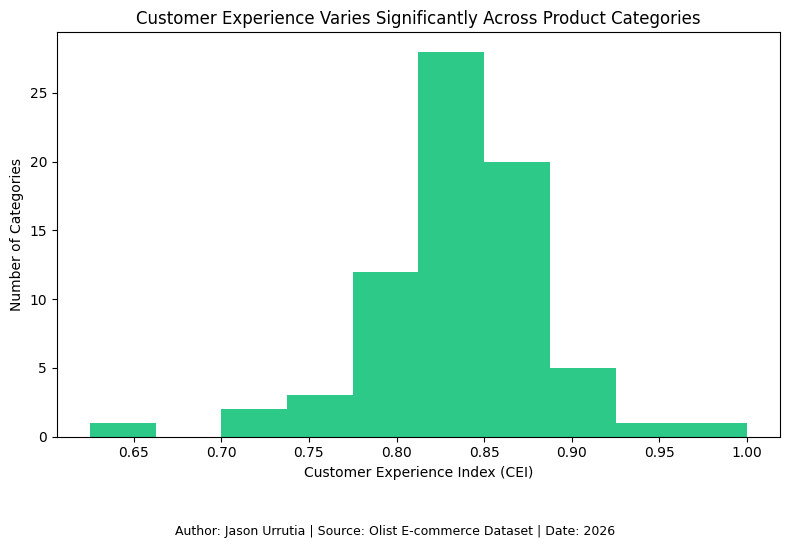

In [46]:
cei_values = category_metrics["category_experience_index"].dropna()

plt.figure(figsize=(8, 5))
plt.hist(cei_values, bins=10, color="#2dc988")
plt.title("Customer Experience Varies Significantly Across Product Categories")
plt.xlabel("Customer Experience Index (CEI)")
plt.ylabel("Number of Categories")
plt.figtext(0.5, -0.08,"Author: Jason Urrutia | Source: Olist E-commerce Dataset | Date: 2026",ha="center",fontsize=9)
plt.tight_layout()
plt.show()

<p><strong>Insight:</strong> Most product categories cluster around a similar experience level, suggesting a consistent but non-exceptional customer experience.</p>
<p><strong>Why it matters:</strong> Operating at an average standard creates a growth ceiling, where incremental improvements can generate disproportionate returns.</p>
<p><strong>Business implication:</strong> Breaking out of this experience plateau requires targeted investments rather than broad, uniform improvements.</p>


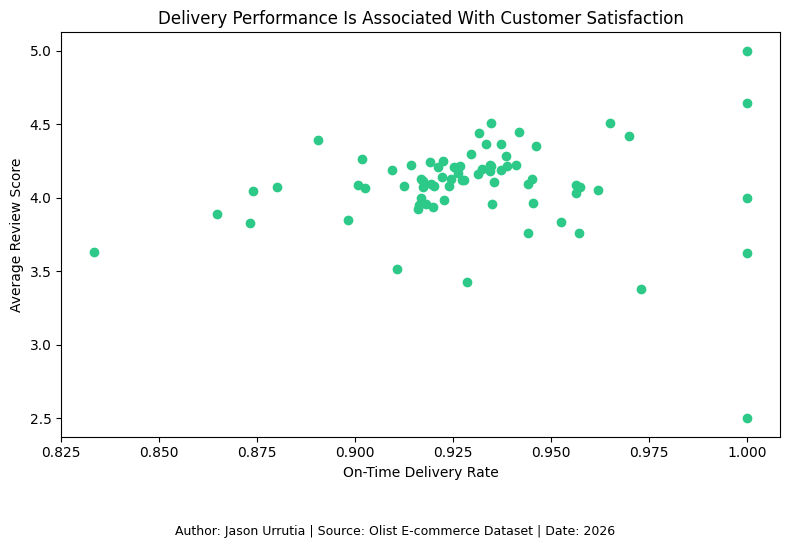

In [47]:
x = category_metrics["on_time_rate"]
y = category_metrics["avg_review_score"]
plt.figure(figsize=(8,5))
plt.scatter(x, y, color="#2dc988")
plt.title("Delivery Performance Is Associated With Customer Satisfaction")
plt.xlabel("On-Time Delivery Rate")
plt.ylabel("Average Review Score")
plt.figtext(0.5, -0.08,"Author: Jason Urrutia | Source: Olist E-commerce Dataset | Date: 2026",ha="center",fontsize=9)
plt.tight_layout()
plt.show()

<p><strong>Insight:</strong> While most categories operate within a narrow performance range, lower delivery reliability is associated with consistently weaker customer ratings.</p>
<p><strong>Why it matters:</strong> Delivery performance alone does not create excellence, but poor logistics reliably prevent high customer satisfaction.</p>
<p><strong>Business implication:</strong> Improving delivery reliability is a necessary condition for experience improvement, though not sufficient by itself.</p>


<h3>Index Validation</h3>

<p>
Top-performing categories consistently combine high delivery reliability
with strong customer perception.
</p>

<p>
Lower-ranked categories represent optimization opportunities rather than
candidates for elimination, aligning with a long-term growth strategy.
</p>

<hr>

<h2>Category Optimization Strategy</h2>

<p>
To prioritize interventions effectively, product categories are segmented
based on customer experience and business impact.
</p>

<p>
This strategic segmentation enables targeted actions that maximize return on effort
and support long-term exponential growth.
</p>

<hr>

In [56]:
#define volume
volume_threshold = category_metrics["num_orders"].median()
cei_threshold = 0.8

#define quadrants
def assign_quadrant(row):
    if row["category_experience_index"] < cei_threshold and row["num_orders"] >= volume_threshold:
        return "Critical Fix"
    elif row["category_experience_index"] >= cei_threshold and row["num_orders"] < volume_threshold:
        return "Hidden Opportunity"
    elif row["category_experience_index"] >= cei_threshold and row["num_orders"] >= volume_threshold:
        return "Growth Engine"
    else:
        return "Re-evaluate"
    
#apply
category_metrics["strategy_quadrant"] = category_metrics.apply(assign_quadrant, axis=1)

In [ ]:
category_metrics["orders_log"] = np.log1p(category_metrics["num_orders"])


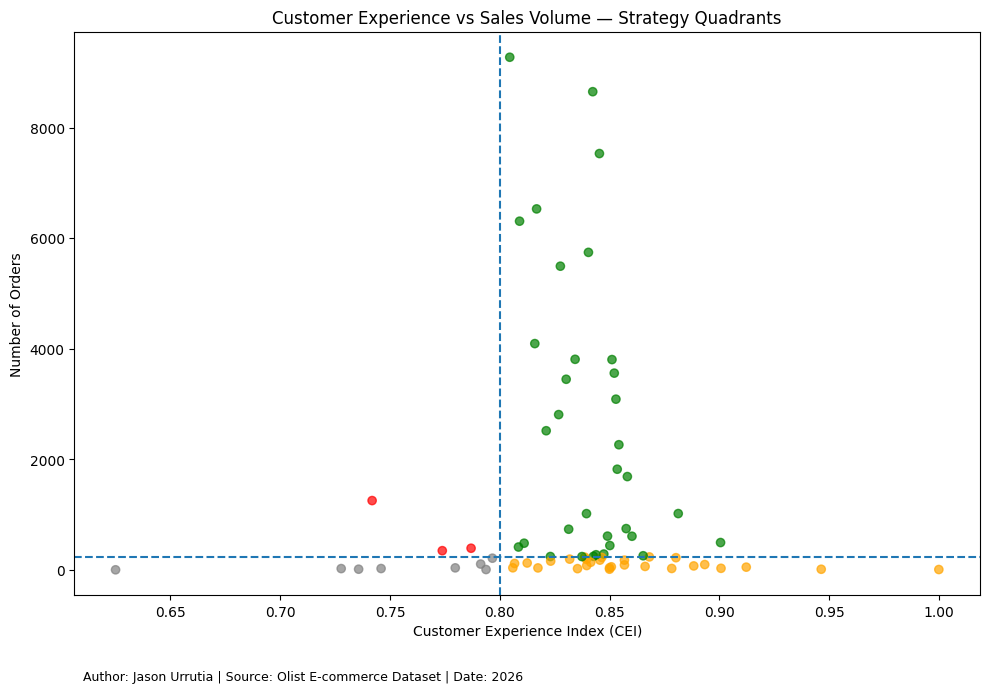

In [58]:
colors = {"Critical Fix": "red",
        "Hidden Opportunity": "orange",
        "Growth Engine": "green",
        "Re-evaluate": "gray"}

plt.figure(figsize=(10, 7))
plt.scatter(category_metrics["category_experience_index"],
            category_metrics["num_orders"],
            c=category_metrics["strategy_quadrant"].map(colors),
            alpha=0.7)
plt.axvline(x=cei_threshold, linestyle="--")
plt.axhline(y=volume_threshold, linestyle="--")
plt.xlabel("Customer Experience Index (CEI)")
plt.ylabel("Number of Orders")
plt.title("Customer Experience vs Sales Volume — Strategy Quadrants")
plt.text(0.01, -0.15,"Author: Jason Urrutia | Source: Olist E-commerce Dataset | Date: 2026",
transform=plt.gca().transAxes,fontsize=9)
plt.tight_layout()
plt.show()

<h2>Strategy Quadrant Analysis</h2>

<p>
The scatter plot above maps each product category according to two key dimensions:
</p>

<ul>
  <li><strong>Customer Experience Index (CEI)</strong> on the x-axis, capturing overall customer satisfaction.</li>
  <li><strong>Number of Orders</strong> on the y-axis, representing commercial impact.</li>
</ul>

<p>
The dashed reference lines divide the space into four strategic quadrants:
</p>

<h4>Growth Engine</h4>
<p>
Categories with <strong>high customer experience and high sales volume</strong>. These represent the core business and should be protected and scaled.
</p>

<h4>Hidden Opportunity</h4>
<p>
Categories with <strong>high customer experience but low sales volume</strong>. These are underexploited assets where targeted investments can unlock growth.
</p>

<h4>Critical Fix</h4>
<p>
Categories with <strong>high sales volume but low customer experience</strong>. Improving these areas can significantly boost overall brand perception.
</p>

<h4>Re-evaluate</h4>
<p>
Categories with <strong>low experience and low volume</strong>. These should be deprioritized or reconsidered.
</p>

<p>
This quadrant framework transforms analytical results into clear strategic priorities, enabling data-driven decisions focused on sustainable growth.
</p>
